<center>

# Introduccion a Programaci√≥n Cu√°ntica ‚Äì CENIDET 

## üß† Mediciones en Qiskit üß†
Autor: **Oscar Alejandro L√≥pez Campero**  
Maestr√≠a en Ciencias de la Computaci√≥n ‚Äì L√≠nea de Ingenier√≠a de Software  
Agosto 2025

---

</center>


## üìö Contenido del M√≥dulo: Medici√≥n y Resultados en Circuitos Cu√°nticos

En este m√≥dulo el estudiante aprender√° a interpretar los resultados de un circuito cu√°ntico mediante **la medici√≥n de qubits**, comprendiendo c√≥mo el estado cu√°ntico colapsa a un valor cl√°sico y c√≥mo esto afecta la probabilidad de los resultados.

Se explorar√°n las herramientas que ofrece Qiskit para simular mediciones, visualizar los resultados mediante histogramas y ejecutar experimentos repetidos (**shots**) para obtener distribuciones estad√≠sticas.

Este conocimiento es esencial para dar el siguiente paso hacia el dise√±o de algoritmos cu√°nticos reales, ya que **todo programa cu√°ntico termina en una medici√≥n**.

---

## üßæ Temario

1Ô∏è‚É£ **Fundamentos de la medici√≥n cu√°ntica**  
2Ô∏è‚É£ **C√≥mo agregar mediciones en Qiskit**  
3Ô∏è‚É£ **Ejemplo: medici√≥n de un qubit en estado base**  
4Ô∏è‚É£ **Medici√≥n de un qubit en superposici√≥n**  
5Ô∏è‚É£ **Visualizaci√≥n de resultados con histogramas**  
6Ô∏è‚É£ **Medici√≥n en sistemas de m√∫ltiples qubits**  
7Ô∏è‚É£ **Interpretaci√≥n estad√≠stica y colapso del estado**  
8Ô∏è‚É£ **Ejercicios y experimentaci√≥n**

---


---

## ‚öôÔ∏è Secci√≥n 1 ‚Äì Fundamentos de la medici√≥n cu√°ntica

En computaci√≥n cu√°ntica, **medir un qubit** significa observar su estado y obtener como resultado un valor cl√°sico:  
- `0` si el qubit colapsa al estado `|0‚ü©`  
- `1` si colapsa al estado `|1‚ü©`

> ‚ö†Ô∏è La medici√≥n **colapsa** el estado cu√°ntico: una vez que se mide, el qubit ya no est√° en superposici√≥n.

Antes de la medici√≥n, un qubit puede estar en un estado como:
$$
|œà‚ü© = Œ±|0‚ü© + Œ≤|1‚ü©
$$


Donde:
- `|Œ±|¬≤` es la **probabilidad** de medir un `0`  
- `|Œ≤|¬≤` es la **probabilidad** de medir un `1`

El resultado que obtienes al medir un qubit **es aleatorio**, pero obedece a esas probabilidades.  
Por eso en Qiskit ejecutamos los circuitos muchas veces (llamados **shots**) para obtener una distribuci√≥n confiable.

---

üß™ En resumen:

- La medici√≥n convierte un estado cu√°ntico en un valor cl√°sico.
- Colapsa la superposici√≥n, eliminando la coherencia.
- Los resultados siguen una distribuci√≥n probabil√≠stica.
- Se representa en Qiskit con `qc.measure(...)`.

---


## üß™ Secci√≥n 2 ‚Äì C√≥mo agregar mediciones en Qiskit

En los circuitos cu√°nticos, las mediciones son el puente entre el mundo cu√°ntico y el cl√°sico.

Medir un qubit significa colapsar su estado cu√°ntico a uno de los dos posibles resultados cl√°sicos: 0 o 1.


Qiskit permite agregar mediciones expl√≠citamente usando el m√©todo `.measure()`.

Este m√©todo conecta un qubit con un bit cl√°sico, y guarda el resultado de la medici√≥n en ese bit cl√°sico.


En esta secci√≥n aprenderemos c√≥mo:

- Agregar una medici√≥n a un circuito cu√°ntico
- Visualizar el circuito con la operaci√≥n de medici√≥n
- Ejecutar el circuito en un simulador y obtener resultados
- Interpretar los resultados de la medici√≥n


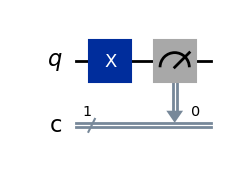

In [2]:
from qiskit import QuantumCircuit

# Crear un circuito cu√°ntico con 1 qubit y 1 bit cl√°sico
qc = QuantumCircuit(1, 1)

# Aplicar compuerta X para poner el qubit en estado |1‚ü©
qc.x(0)

# Medir el qubit 0 y guardar el resultado en el bit cl√°sico 0
qc.measure(0, 0)

# Mostrar el circuito
qc.draw('mpl')


### üîç ¬øQu√© vemos en el diagrama del circuito?

El circuito mostrado contiene **1 qubit** (`q0`) y **1 bit cl√°sico** (`c0`). Visualmente se representa como dos l√≠neas horizontales:  
- La **l√≠nea superior** corresponde al **qubit q0**  
- La **l√≠nea inferior** corresponde al **bit cl√°sico c0**

Los elementos que aparecen en el diagrama son:

- `x`: Compuerta X (NOT cu√°ntico) aplicada al qubit `q0`. Cambia su estado de `|0‚ü©` a `|1‚ü©`.
- `measure`: S√≠mbolo de medici√≥n que indica que se realiza una medici√≥n sobre el qubit `q0`.
- **Conexi√≥n hacia `c0`**: La medici√≥n del qubit se guarda en el bit cl√°sico `c0`, mostrando la transici√≥n del mundo cu√°ntico al mundo cl√°sico.

üîÅ En este caso, como aplicamos la compuerta `X` antes de medir, el estado cu√°ntico final del qubit es `|1‚ü©`.  
Por lo tanto, **el resultado cl√°sico medido ser√° siempre `1`**.


### ‚ñ∂Ô∏è Ejecutar el circuito y visualizar resultados

Una vez que tenemos un circuito con medici√≥n, es momento de **simularlo** y observar qu√© resultado obtenemos al medir el qubit.

En este ejemplo, usaremos el simulador `BasicSimulator` de Qiskit, que permite ejecutar el circuito de forma simple sin dependencias externas. Ejecutaremos el circuito **1024 veces** y contaremos cu√°ntas veces se obtiene cada posible resultado (0 o 1).

Usamos las siguientes funciones de Qiskit:

- `BasicSimulator()`: crea un simulador cl√°sico que ejecuta circuitos cu√°nticos y produce resultados probabil√≠sticos.
- `simulator.run(circuito, shots=1024)`: ejecuta el circuito 1024 veces para recolectar estad√≠sticas sobre las mediciones.
- `result.get_counts()`: obtiene un diccionario con los resultados de la medici√≥n, donde las claves son los estados medidos (como "0" o "1") y los valores indican cu√°ntas veces se midi√≥ cada uno.
- `plot_histogram(counts)`: genera un histograma que muestra visualmente la frecuencia con la que aparece cada estado medido.

Este tipo de simulaci√≥n nos ayuda a **comprender la naturaleza probabil√≠stica** de los sistemas cu√°nticos una vez que se realiza una medici√≥n.


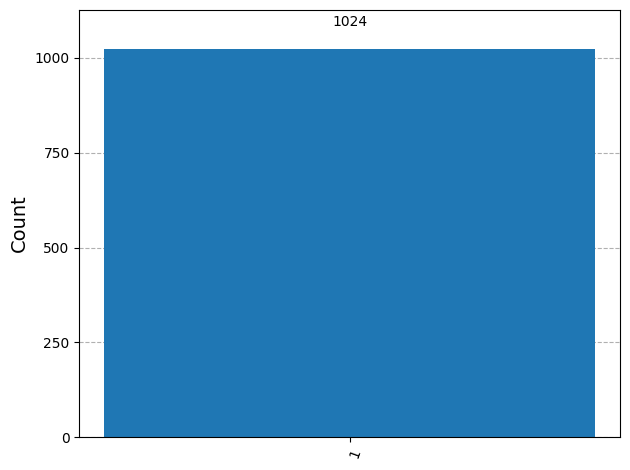

In [5]:
# Importar componentes actualizados
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Crear circuito con una compuerta Hadamard y medici√≥n
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0, 0)

# Usar BasicSimulator (proveedor b√°sico moderno)
simulator = BasicSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Mostrar resultados
plot_histogram(counts)


## üìå Ejemplo: Compuerta Hadamard y Medici√≥n

En este ejemplo aplicaremos una **compuerta Hadamard** al qubit para colocarlo en **superposici√≥n**, y luego realizaremos una **medici√≥n** para observar los resultados posibles.

La compuerta Hadamard transforma el estado |0‚ü© en una superposici√≥n entre |0‚ü© y |1‚ü©.  
Al medir este estado, se colapsa a uno de los dos resultados con una **probabilidad del 50%** cada uno (idealmente).

Este experimento nos permite observar **el comportamiento probabil√≠stico de un sistema cu√°ntico** al aplicar una compuerta antes de medir.


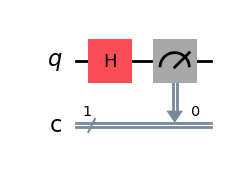

In [1]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Crear circuito con 1 qubit y 1 bit cl√°sico
qc = QuantumCircuit(1, 1)

# Aplicar compuerta Hadamard al qubit
qc.h(0)

# Medir el qubit 0
qc.measure(0, 0)

# Mostrar diagrama del circuito
qc.draw('mpl')


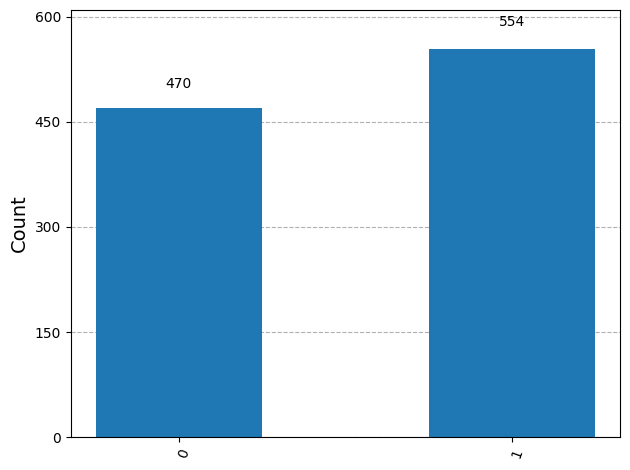

In [8]:
# Importar componentes actualizados
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Crear circuito con una compuerta Hadamard y medici√≥n
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# Usar BasicSimulator (proveedor b√°sico moderno)
simulator = BasicSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Mostrar resultados
plot_histogram(counts)

## üß† ¬øQu√© observamos?

Despu√©s de aplicar la compuerta Hadamard, el qubit tiene **probabilidad de colapsar a |0‚ü© o a |1‚ü©** cuando se mide.

El histograma nos muestra la distribuci√≥n de resultados tras simular el circuito 1024 veces.  
Idealmente, veremos que los resultados est√°n distribuidos casi por igual entre ambos valores, evidenciando la **naturaleza probabil√≠stica de la mec√°nica cu√°ntica**.

Este tipo de an√°lisis es clave para entender c√≥mo los algoritmos cu√°nticos manipulan las probabilidades antes de medir.


# üîç Secci√≥n 3.3 ‚Äì Comparaci√≥n: pocos vs muchos shots en la medici√≥n

En esta secci√≥n exploraremos c√≥mo el **n√∫mero de repeticiones (shots)** en una simulaci√≥n cu√°ntica **afecta los resultados de la medici√≥n**.  
Usaremos un circuito sencillo que pone al qubit en superposici√≥n con una compuerta **Hadamard** y lo mediremos con diferentes cantidades de ejecuciones.

Este an√°lisis es clave para comprender el **comportamiento probabil√≠stico** de los sistemas cu√°nticos y c√≥mo se estabilizan los resultados con m√°s repeticiones.


### ‚öôÔ∏è Circuito cu√°ntico base

El siguiente circuito aplica una compuerta **Hadamard** al qubit 0, lo cual genera una superposici√≥n equitativa entre los estados |0‚ü© y |1‚ü©.  
Luego, se mide ese qubit y se guarda el resultado en un bit cl√°sico.

Este circuito ser√° la base para las simulaciones con diferentes cantidades de shots.


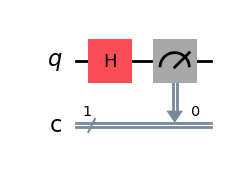

In [9]:
# Crear el circuito base
from qiskit import QuantumCircuit

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')


### üìâ Simulaci√≥n con pocos shots (10)

En esta simulaci√≥n ejecutamos el circuito √∫nicamente **10 veces**, lo cual puede generar **resultados aleatorios** no representativos de las verdaderas probabilidades cu√°nticas.

Esto nos ayuda a visualizar c√≥mo el n√∫mero de ejecuciones afecta la estabilidad de los resultados.


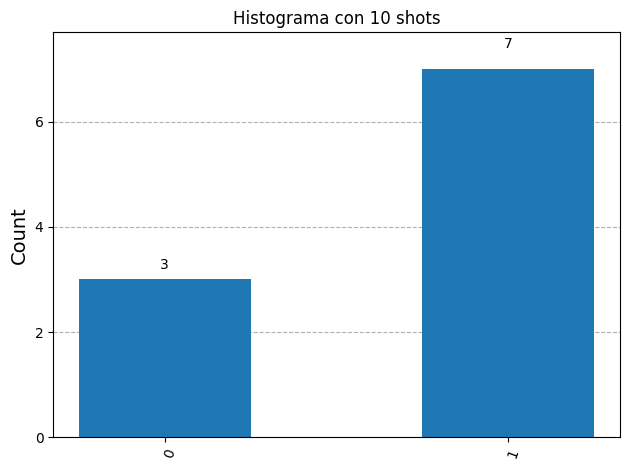

In [11]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Simulaci√≥n con pocos shots
simulator = BasicSimulator()
job_10 = simulator.run(qc, shots=10)
result_10 = job_10.result()
counts_10 = result_10.get_counts()

plot_histogram(counts_10, title="Histograma con 10 shots")


### üìà Simulaci√≥n con muchos shots (5000)

En esta simulaci√≥n ejecutamos el mismo circuito, pero ahora **5000 veces**.  
Con esta cantidad de ejecuciones, se espera que los resultados se **acercan a las probabilidades te√≥ricas esperadas**.

Como la compuerta Hadamard sobre el estado |0‚ü© genera una distribuci√≥n 50%-50%, el histograma deber√≠a mostrar ambos valores con frecuencias similares.


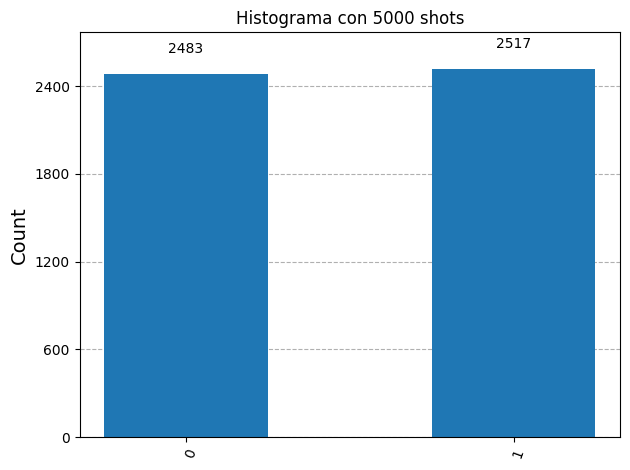

In [13]:
# Simulaci√≥n con muchos shots
job_5000 = simulator.run(qc, shots=5000)
result_5000 = job_5000.result()
counts_5000 = result_5000.get_counts()

plot_histogram(counts_5000, title="Histograma con 5000 shots")


### üß† An√°lisis de resultados

- Con **solo 10 shots**, el histograma puede variar mucho debido a la **naturaleza probabil√≠stica y aleatoria** de la medici√≥n cu√°ntica.  
  Por ejemplo, podr√≠amos obtener 7 veces "1" y solo 3 veces "0", lo cual **no representa la verdadera distribuci√≥n** esperada.  
  Esto se debe a que con tan pocas muestras, el **error estad√≠stico es muy alto** y el azar domina el resultado.

- Con **5000 shots**, el circuito se ejecuta suficientes veces como para que las **probabilidades reales emerjan**.  
  La compuerta Hadamard sobre el estado |0‚ü© genera una superposici√≥n equitativa entre |0‚ü© y |1‚ü©, es decir, **50% de probabilidad para cada uno**.  
  Al repetir la medici√≥n miles de veces, el sistema revela su naturaleza probabil√≠stica y los resultados convergen hacia ese equilibrio esperado.

üìå **¬øPor qu√© pasa esto?**  
La computaci√≥n cu√°ntica **no da resultados deterministas** al medir un qubit en superposici√≥n. En su lugar, los resultados son **probabil√≠sticos**.  
Por lo tanto, necesitamos **repetir muchas veces** la misma medici√≥n (shots) para que las **frecuencias observadas reflejen las verdaderas probabilidades cu√°nticas**.  
Este fen√≥meno es an√°logo a lanzar una moneda al aire muchas veces: solo con suficientes lanzamientos podremos decir que realmente es una moneda justa.



## üìö Referencias

1. M. A. Nielsen y I. L. Chuang, *Quantum Computation and Quantum Information*, 10th Anniversary Edition, Cambridge University Press, 2010.

2. IBM Quantum. [Qiskit Documentation](https://docs.qiskit.org) ‚Äî Documentaci√≥n oficial de Qiskit. Consultado en agosto de 2025.

3. IBM Quantum. [Qiskit Textbook ‚Äì Chapter 1.3: Quantum Measurement](https://qiskit.org/textbook/ch-states/quantum-measurements.html) ‚Äî Explicaci√≥n detallada sobre c√≥mo funcionan las mediciones en sistemas cu√°nticos.

4. Qiskit Contributors. [Learn Quantum Computation using Qiskit](https://qiskit.org/textbook) ‚Äî Texto oficial y gratuito para aprender computaci√≥n cu√°ntica con Qiskit.

5. T. Hidary, *Quantum Computing: An Applied Approach*, 2nd ed., Springer, 2021.

6. R. S. S. Kaur y J. Venegas-G√≥mez, ‚ÄúQuantum Computing: A Primer for the Software Developer,‚Äù *arXiv preprint*, arXiv:2011.12907, 2020. https://arxiv.org/abs/2011.12907

7. A. Singh, P. Upadhyaya, S. Sharma, et al., ‚ÄúA Survey on Available Tools and Technologies Enabling Quantum Computing,‚Äù *ACM Computing Surveys*, vol. 55, no. 1, pp. 1‚Äì38, 2023.

8. P. Aiello, M. Felderer, R. P√©rez-Castillo, ‚ÄúQuantum Software Engineering: State-of-the-Art, Challenges, and Future Research Agenda,‚Äù *Information and Software Technology*, vol. 150, 2022.

9. J. D. Weisz, M. Ashoori, Z. Ashktorab, ‚ÄúEntanglion: A Board Game for Teaching the Principles of Quantum Computing,‚Äù *CHI EA '21*, ACM, 2021.

10. Qiskit Community Tutorials. [Measurements and Classical Bits in Qiskit](https://qiskit.org/documentation/tutorials/circuits/03_measuring_qubits.html) ‚Äî Tutorial paso a paso sobre c√≥mo implementar y entender mediciones en Qiskit.

11. Quantum Country. [Spaced Repetition Guide to Quantum Measurement](https://quantum.country/qcvc) ‚Äî Una gu√≠a interactiva para aprender los fundamentos de la medici√≥n en mec√°nica cu√°ntica.
